In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/GTD/

Mounted at /content/drive
/content/drive/My Drive/GTD


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
dataFrame = pd.read_excel("globalterrorismdb_0221dist.xlsx")

In [ ]:
data=dataFrame

In [ ]:
data =data.loc[data.gname != 'Unknown']
data.shape

(111952, 135)

In [ ]:
fg = []
i = 0           # Filtered groups
while i < 10:
    a = data["gname"].value_counts().index[i]
    fg.append(a)
    i += 1

In [ ]:
fg

['Taliban',
 'Islamic State of Iraq and the Levant (ISIL)',
 'Shining Path (SL)',
 'Al-Shabaab',
 'Farabundo Marti National Liberation Front (FMLN)',
 "New People's Army (NPA)",
 'Boko Haram',
 'Houthi extremists (Ansar Allah)',
 'Irish Republican Army (IRA)',
 "Kurdistan Workers' Party (PKK)"]

In [ ]:
data=data[data['gname'].isin(fg)]

In [ ]:
data.shape

(43234, 135)

In [ ]:
check_nulls = data.isnull().sum().sort_values(ascending=False)
row_count = data.shape[0]
check_nulls_percentage = 100 * check_nulls / row_count
bins = (-1, 0, 25, 50, 75, 100)
labels = ['0 %','1-25 %','25-50 %','50-75 %','75-100 %']
check_nulls_percentage_grouped = pd.cut(check_nulls_percentage, bins, labels=labels)


In [ ]:
check_nulls_percentage_grouped_counts = check_nulls_percentage_grouped.value_counts()
check_nulls_percentage_grouped_counts.sort_index()

0 %         33
1-25 %      15
25-50 %     10
50-75 %      8
75-100 %    69
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Sütun Sayısı')

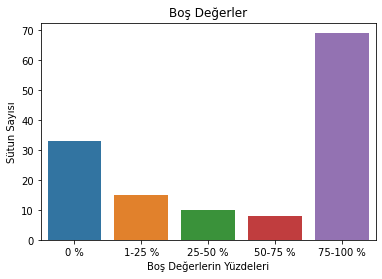

In [ ]:
sbn.barplot(check_nulls_percentage_grouped_counts.index, check_nulls_percentage_grouped_counts.values)
plt.title('Boş Değerler')
plt.xlabel('Boş Değerlerin Yüzdeleri')
plt.ylabel('Sütun Sayısı')

In [ ]:
def remove_columns_missing_values(data, min_threshold):
    for col in data.columns:
        rate = data[col].isnull().sum()/float(len(data)) * 100
        if rate >= min_threshold:
            data = data.drop(col,1)
    return data

In [ ]:
data = remove_columns_missing_values(data, 0.001)
print ("Kalan öznitelik sayısı :")
len(data.columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


Kalan öznitelik sayısı :


33

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43234 entries, 39 to 201177
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventid          43234 non-null  int64  
 1   iyear            43234 non-null  int64  
 2   imonth           43234 non-null  int64  
 3   iday             43234 non-null  int64  
 4   extended         43234 non-null  int64  
 5   country          43234 non-null  int64  
 6   country_txt      43234 non-null  object 
 7   region           43234 non-null  int64  
 8   region_txt       43234 non-null  object 
 9   provstate        43234 non-null  object 
 10  specificity      43234 non-null  float64
 11  vicinity         43234 non-null  int64  
 12  crit1            43234 non-null  int64  
 13  crit2            43234 non-null  int64  
 14  crit3            43234 non-null  int64  
 15  doubtterr        43234 non-null  int64  
 16  multiple         43234 non-null  int64  
 17  success   

In [ ]:
columns_to_drop = data .columns[data .columns.map(lambda x: 'txt' in x)]
data = data .drop(columns_to_drop,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43234 entries, 39 to 201177
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   eventid      43234 non-null  int64  
 1   iyear        43234 non-null  int64  
 2   imonth       43234 non-null  int64  
 3   iday         43234 non-null  int64  
 4   extended     43234 non-null  int64  
 5   country      43234 non-null  int64  
 6   region       43234 non-null  int64  
 7   provstate    43234 non-null  object 
 8   specificity  43234 non-null  float64
 9   vicinity     43234 non-null  int64  
 10  crit1        43234 non-null  int64  
 11  crit2        43234 non-null  int64  
 12  crit3        43234 non-null  int64  
 13  doubtterr    43234 non-null  int64  
 14  multiple     43234 non-null  int64  
 15  success      43234 non-null  int64  
 16  suicide      43234 non-null  int64  
 17  attacktype1  43234 non-null  int64  
 18  targtype1    43234 non-null  int64  
 19  gn

In [ ]:
data["provstate"].value_counts()

Northern Ireland    2295
Borno               1729
Lima                1606
Nineveh             1277
Banaadir            1223
                    ... 
Marsabit               1
Punjab                 1
Gharbia                1
Eskisehir              1
Lupon                  1
Name: provstate, Length: 471, dtype: int64

In [ ]:
data.show(10)

AttributeError: ignored